# Analysis of for climate indices

In this tutorial, we present some examples how to handle climate indices.

- create and define climate indices
- compare multiple indices
- get spatial correlation analysis to different variables

This example will describe the definition of the Circumglobal teleconnection index (CGTI) defined by [Ding&Wang 2005](https://doi.org/10.1175/JCLI3473.1).

This index is compared to the related Silk Road Pattern (SRP) defined by [Enomoto 2003](https://rmets.onlinelibrary.wiley.com/doi/abs/10.1256/qj.01.211)

In [45]:
# load libraries and files
import xarray as xr
import geoutils.utils.file_utils as fut
import geoutils.utils.general_utils as gut
import geoutils.utils.statistic_utils as sut
import geoutils.utils.spatial_utils as sput
import geoutils.utils.time_utils as tu
import geoutils.tsa.time_series_analysis as tsa
import geoutils.geodata.base_dataset as bds
import geoutils.geodata.wind_dataset as wds
import geoutils.plotting.plots as cplt
import geoutils.indices.cgt_index as cgti
import geoutils.indices.srp_index as srp
from importlib import reload

output_dir = "/home/strnad/data/"
data_dir = "/home/strnad/data/"
plot_dir = "/home/strnad/data/plots/tutorial/"
output_folder = "tutorial"


In [6]:
# Load the data files
# z200
reload(bds)
dataset_file = data_dir + \
    f"/climate_data/1/era5_z_1_{200}_ds.nc"

ds_z_200 = bds.BaseDataset(data_nc=dataset_file,
                         can=True,
                         # compute the anomalies wrt JJAS, month and dayofyear
                         an_types=['month', 'dayofyear'],
                         )


File location: /home/strnad/data/climate_data/1/era5_z_1_200_ds.nc
File size: 3.64 GB
Start processing data!
3d object transposed to lat-lon-time!
Sorted longitudes and latitudes in ascending order!
Set time to np.datetime[ns] time format!
set hours to 0
Compute geopotential height from z! 
 Multiply by 1/9.80665
Finished processing data
Set variable name to z!
Created monthly anomalies!
Rename z to z_an_month!
Created dayofyearly anomalies!
Rename z to z_an_dayofyear!
WARNING! No mask initialized!
Set dataset source attributes!


In [7]:
# V200 wind field for SRP index
reload(bds)
lev = 200
dataset_file_v = output_dir + \
    f"/climate_data/1/era5_v_{1}_{lev}_ds.nc"
v200 = bds.BaseDataset(data_nc=dataset_file_v,
                       can=True,
                       an_types=['dayofyear', 'JJAS'],
                       lat_range=[-20, 90],  # Only northern hemisphere
                       #    month_range=['Jun', 'Sep'],
                       timemax='day',
                       init_mask=False)

File location: /home/strnad/data/climate_data/1/era5_v_1_200_ds.nc
File size: 3.64 GB
Start processing data!
3d object transposed to lat-lon-time!
Sorted longitudes and latitudes in ascending order!
Set time to np.datetime[ns] time format!
set hours to 0
Cut the dataset [-180, 180], [-20, 90]!
Finished processing data
Compute dayly maximum of all variables!
Set variable name to v!
Created dayofyearly anomalies!
Rename v to v_an_dayofyear!
Created JJASly anomalies!
Rename v to v_an_JJAS!
WARNING! No mask initialized!
Set dataset source attributes!


In [9]:
# Load wind field data on multiple levels (200, 500, 850)
# wind data
reload(wds)
nc_files_u = []
nc_files_v = []
nc_files_w = []

levs = [200, 500, 850]

for lev in levs:
    dataset_file_u = data_dir + \
        f"/climate_data/2.5/era5_u_{2.5}_{lev}_ds.nc"
    nc_files_u.append(dataset_file_u)
    dataset_file_v = data_dir + \
        f"/climate_data/2.5/era5_v_{2.5}_{lev}_ds.nc"
    nc_files_v.append(dataset_file_v)
    dataset_file_w = data_dir + \
        f"/climate_data/2.5/era5_w_{2.5}_{lev}_ds.nc"
    nc_files_w.append(dataset_file_w)

reload(wds)
ds_wind = wds.Wind_Dataset(data_nc_u=nc_files_u,
                           data_nc_v=nc_files_v,
                           data_nc_w=nc_files_w,
                           plevels=levs,
                           can=True,
                           an_types=['month', 'JJAS'],
                           month_range=['Jun', 'Sep'], # only important for JJAS season
                           init_mask=False
                           )

Load time_range:(numpy.datetime64('1979-01-01T00:00:00.000000000'), numpy.datetime64('2019-12-31T00:00:00.000000000'))
All files are available! Now load them!
All files are available! Loading ['/home/strnad/data//climate_data/2.5/era5_u_2.5_200_ds.nc', '/home/strnad/data//climate_data/2.5/era5_u_2.5_500_ds.nc', '/home/strnad/data//climate_data/2.5/era5_u_2.5_850_ds.nc']...
File location: /home/strnad/data/climate_data/2.5/era5_u_2.5_200_ds.nc
File size: 600.62 MB
File location: /home/strnad/data/climate_data/2.5/era5_u_2.5_500_ds.nc
File size: 600.62 MB
File location: /home/strnad/data/climate_data/2.5/era5_u_2.5_850_ds.nc
File size: 600.62 MB
Load time_range:(numpy.datetime64('1979-01-01T00:00:00.000000000'), numpy.datetime64('2019-12-31T00:00:00.000000000'))
Start processing data!
object transposed to lat-lon-lev-time!
Sorted longitudes and latitudes in ascending order!
Set time to np.datetime[ns] time format!
set hours to 0
Time steps within 1979-01-01-2019-12-31 selected!
Time step

## CGTI analysis
We first analyse the CGTI index

In [12]:
reload(cgti)
# Use the Ding&Wang definition (see function for details)
cgt_index = cgti.get_cgt_index(ds_z_200.ds['an_dayofyear'], )


In [ ]:
var_type = 'an_dayofyear'

# instant correlation of z200 anomalies with cgti
corr_z200_cgti = sput.compute_correlation(
    data_array=ds_z_200.ds[var_type],
    ts=cgt_index['cgti'],
    correlation_type='spearman')


/home/strnad/anaconda3/envs/climnet/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


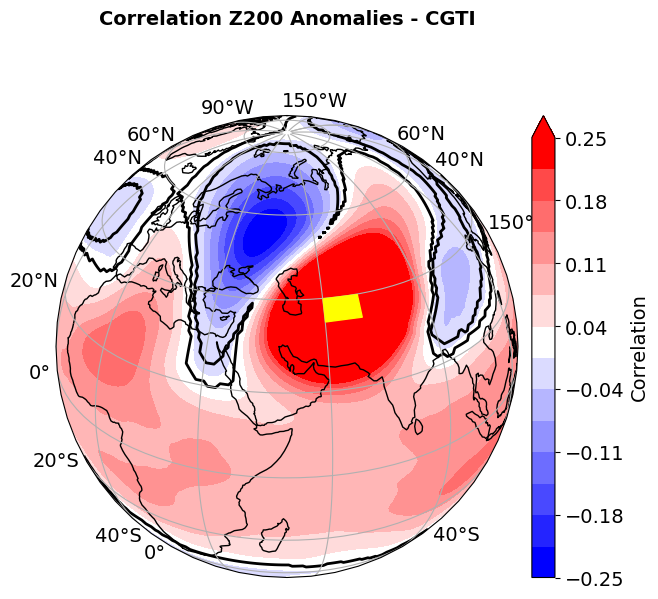

In [24]:
reload(cplt)
idx = 1
vmax = .25
vmin = -vmax
im = cplt.plot_map(
    corr_z200_cgti['corr'].sel(lag=0),
    significance_mask=corr_z200_cgti['p'].sel(lag=0) < 0.05,
    sig_plot_type='contour',
    cmap='bwr',
    levels=14,
    plot_type='contourf',
    central_longitude=50,
    central_latitude=30,
    projection='Nearside',
    label=f'Correlation',
    title=f'Correlation Z200 Anomalies - CGTI',
    vmin=vmin,
    vmax=vmax,
    orientation='vertical',
    round_dec=2,
)

# This rectangle is for the CGTI region definition (see Ding&Wang 2005)
im = cplt.plot_rectangle(ax=im['ax'],
                    lon_range=[60, 70],
                    lat_range=[35, 40],
                    color='yellow',
                    fill=True)

The CGTI index can be subdivided into positive and negative phases. The composites for these phases look for example like this:

Select data from Jun - Sep!
Select data from Jun - Sep!
Select data from Jun - Sep!


/home/strnad/climnet/geoutils/geoutils/plotting/map_plots.py:1067: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/home/strnad/climnet/geoutils/geoutils/plotting/plotting_utils.py:448: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(
/home/strnad/anaconda3/envs/climnet/lib/python3.9/site-packages/cartopy/crs.py:529: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  warnings.warn('Some vectors at source domain corners '


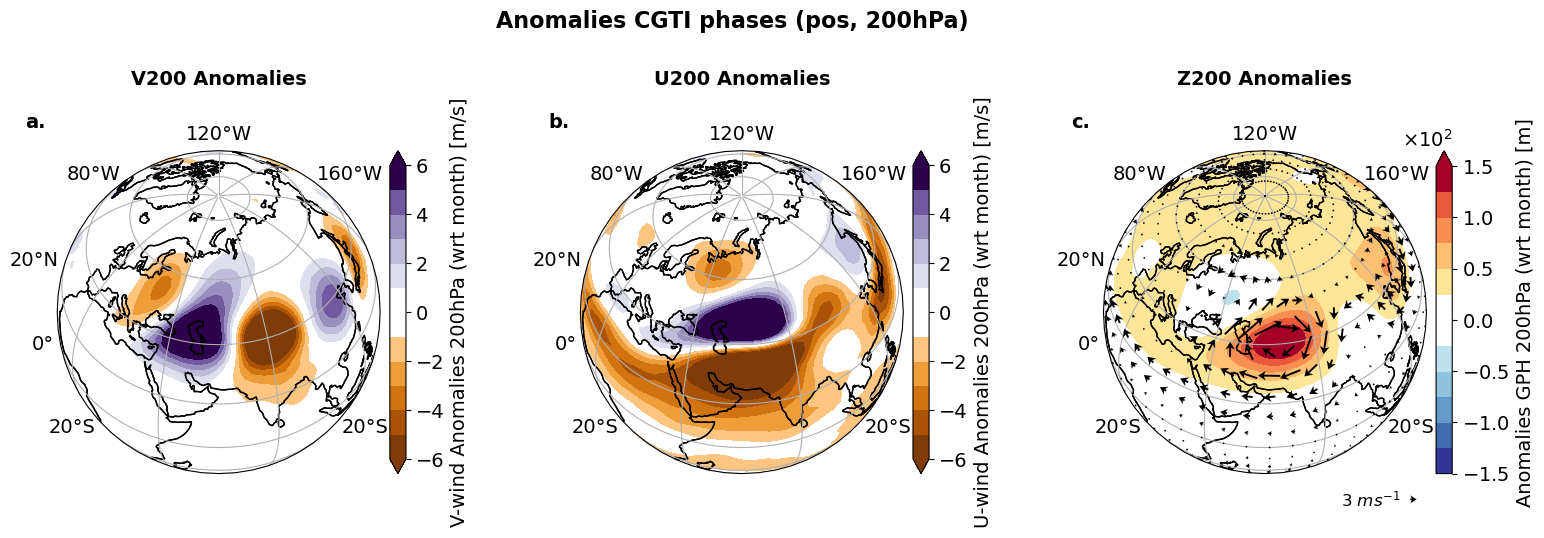

In [100]:
lev = 200
an_type = 'month'
var_type = f'an_{an_type}'
ctype = 'pos'
z200 = tu.get_month_range_data(ds_z_200.ds[var_type], 'Jun',
                               'Sep')
v200 = tu.get_month_range_data(ds_wind.ds[f'V_an_{an_type}'].sel(lev=lev), 'Jun',
                               'Sep')
u200 = tu.get_month_range_data(ds_wind.ds[f'U_an_{an_type}'].sel(lev=lev), 'Jun',
                               'Sep')

cgt_tps = cgti.get_cgti_strength(z200=z200,)

im = cplt.create_multi_plot(nrows=1, ncols=3,
                            figsize=(18, 5),
                            title=f'Anomalies CGTI phases ({ctype}, {200}hPa)',
                            projection='Nearside',
                            central_longitude=60,
                            central_latitude=50,
                            lon_range=[-50, 180],
                            lat_range=[-30, 70],
                            wspace=0.5)

mean_tps_v = tu.get_sel_tps_ds(v200,
                               cgt_tps[ctype].time).mean('time')
vmax = 6
vmin = -vmax

im_comp = cplt.plot_map(mean_tps_v,
                        ax=im['ax'][0],
                        orientation='vertical',
                        plot_type='contourf',
                        cmap='PuOr',
                        centercolor='white',
                        levels=12,
                        vmin=vmin, vmax=vmax,
                        title=f"V200 Anomalies",
                        label=rf'V-wind Anomalies {lev}hPa (wrt {an_type}) [m/s]',
                        )

mean_tps_u = tu.get_sel_tps_ds(u200,
                               cgt_tps[ctype].time).mean('time')
vmax = 6
vmin = -vmax

im_comp = cplt.plot_map(mean_tps_u,
                        ax=im['ax'][1],
                        plot_type='contourf',
                        orientation='vertical',
                        cmap='PuOr',
                        centercolor='white',
                        levels=12,
                        vmin=vmin, vmax=vmax,
                        title=f"U200 Anomalies",
                        label=rf'U-wind Anomalies {lev}hPa (wrt {an_type}) [m/s]',
                        )

mean_tps = tu.get_sel_tps_ds(z200,
                             cgt_tps[ctype].time).mean('time')
vmax = 1.5e2
vmin = -vmax
im_comp = cplt.plot_map(mean_tps,
                        ax=im['ax'][2],
                        plot_type='contourf',
                        orientation='vertical',
                        cmap='RdYlBu_r',
                        centercolor='white',
                        levels=12,
                        vmin=vmin, vmax=vmax,
                        title=f"Z200 Anomalies",
                        label=rf'Anomalies GPH {lev}hPa (wrt {an_type}) [m]',
                        )
dict_w = cplt.plot_wind_field(ax=im['ax'][2],
                              u=mean_tps_u,
                              v=mean_tps_v,
                              scale=150,
                              steps=3,  # plot only every 3rd wind arrow
                              key_length=3,
                              )

savepath = plot_dir + \
    f"climate_indices/z200_uv200_{an_type}_cgti_{ctype}.png"
cplt.save_fig(savepath=savepath, fig=im['fig'])


## SRP analysis
The SRP is defined via the first PCA of the V200 winds 

In [28]:
reload(srp)
idx = 0
srp_dict = srp.get_srp_index(v200, 
                             timemean=None,
                             var_name='an_dayofyear',
                             idx=idx)

WARNING! No mask initialized!
Prepare the dataset to TxN array for variable an_dayofyear!
Now run PCA with rotation None!
Finished!
Init as well a mask for dataset!
Init spatial mask for shape: (14975, 41, 100)
... Finished Initialization spatial mask
Init the point-idx dictionaries
Now prepare PCA dictionary...
... finished!


PlateCarree


/home/strnad/climnet/geoutils/geoutils/plotting/plotting_utils.py:448: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(


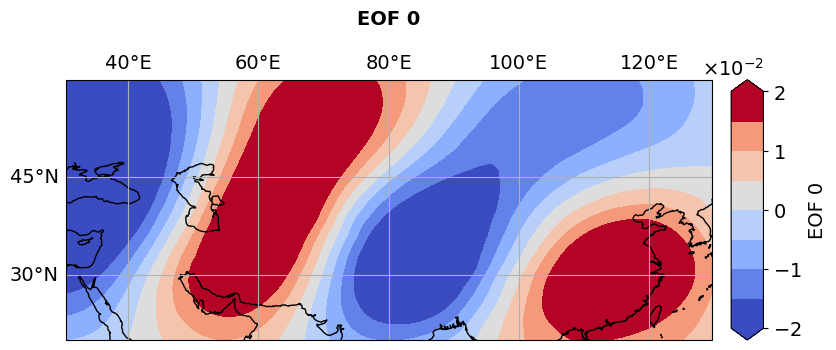

In [34]:
# Plot the spatial map of PCA 1
reload(cplt)
vmax = 2e-2
vmin = -vmax
im = cplt.plot_map(
    srp_dict['map'],
    cmap='coolwarm',
    central_longitude=80,
    central_latitude=50,
    projection='PlateCarree',
    label=f'EOF {idx}',
    title=f'EOF {idx}',
    vmin=vmin,
    vmax=vmax,
    orientation='vertical'
)


In [61]:
# Correlation of SRP index with V200 for JJAS season (ds_wind is only defined for JJAS)
reload(tu)
reload(sput)
lev = 200
corr_v200_srp = sput.compute_correlation(
    data_array=ds_wind.ds['V_an_month'].sel(lev=lev),
    ts=srp_dict['index'],
    correlation_type='spearman')


Equalize time points of both datasets!
Computing spearman correlation for 144 locations ...


100%|██████████| 144/144 [00:20<00:00,  6.87it/s]


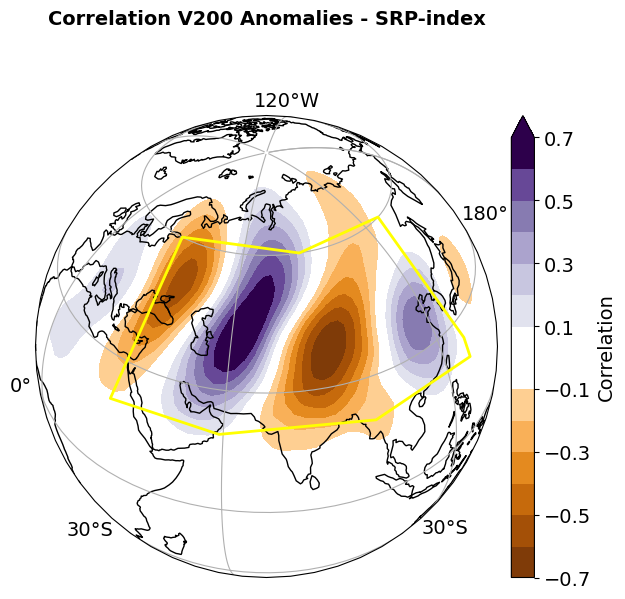

In [68]:
reload(cplt)
idx = 1
vmax = .7
vmin = -vmax
im = cplt.plot_map(
    corr_v200_srp['corr'].sel(lag=0),
    # significance_mask=corr_v200_srp['p'].sel(lag=0) < 0.05,
    sig_plot_type='contour',
    cmap='PuOr',
    centercolor='white',
    levels=14,
    plot_type='contourf',
    central_longitude=70,
    central_latitude=40,
    projection='Nearside',
    label=f'Correlation',
    title=f'Correlation V200 Anomalies - SRP-index',
    vmin=vmin,
    vmax=vmax,
    orientation='vertical',
    round_dec=2,
)

# This rectangle defines the area that is used to compute the PCA for the SRP index
cplt.plot_rectangle(ax=im['ax'],
                    lon_range=[30, 130],
                    lat_range=[20, 60],
                    color='yellow',
                    lw=2,
                    )

savepath = plot_dir +\
    f"/climate_indices/srp_v200_dayofyear_anomalies_corr.png"
cplt.save_fig(savepath, fig=im['fig'])

## Comparison of CGTI to SRP
This section shows how different climate indices (in this case the SRP and CGTI) can be compared.

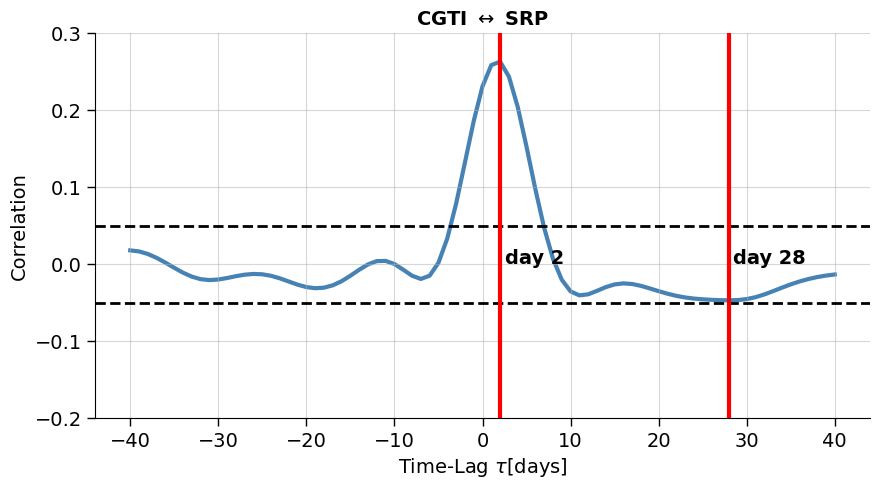

In [74]:
# Compute the lead-lag between both indices
timemean = 'day'
maxlags = 40
cutoff = 5
p = 0.05
ts1 = cgt_index['cgti']
ts2 = srp_dict['index']
ll_dict1 = tu.lead_lag_corr(ts1=ts1, ts2=ts2,
                            maxlags=maxlags,
                            cutoff=cutoff,
                            corr_method='spearman',
                            )
tau_lag = ll_dict1['tau']
lag_corr1 = ll_dict1['corr']
p_vals = ll_dict1['p_val']
im = cplt.plot_xy(
    x_arr=[tau_lag
           ],
    y_arr=[lag_corr1,
           ],
    title=fr'CGTI $\leftrightarrow$ SRP',
    xlabel=r'Time-Lag $\tau$'+f'[{timemean}s]',
    ylabel='Correlation',
    figsize=(10, 5),
    # title=f'Lead-Lag Correlations',
    ylim=(-0.2, 0.3),
    loc='upper right',
    lw_arr=[3],
    ls_arr=['-', '-', '-'],
    mk_arr=[None, None, None],
    stdize=False,
    set_grid=True
)

# Show significance levels
cplt.plot_hline(
    ax=im['ax'],
    y=p,
    color='black',
    ls='dashed',
    lw=2,
    label="significance level")
cplt.plot_hline(
    ax=im['ax'],
    y=-p,
    color='black',
    ls='dashed',
    lw=2,
    label="significance level")

# Show maximum correlation by a red line
cplt.plot_vline(
    ax=im['ax'],
    x=ll_dict1['tau_max'],
    color='red',
    ls='solid',
    lw=3,
)
cplt.plt_text(ax=im['ax'],
              xpos=ll_dict1['tau_max']+0.5,
              ypos=-0.,
              text=f'{timemean} {ll_dict1["tau_max"]}',
              box=False
              )
# Show minimum correlation by a red line
cplt.plot_vline(
    ax=im['ax'],
    x=ll_dict1['tau_min'],
    color='red',
    ls='solid',
    lw=3,
)
cplt.plt_text(ax=im['ax'],
              xpos=ll_dict1['tau_min']+0.5,
              ypos=-0.,
              text=f'{timemean} {ll_dict1["tau_min"]}',
              )

savepath = plot_dir +\
    f"/climate_indices/{timemean}_lead_lag_cutoff_{cutoff}_cgti_srp.pdf"
cplt.save_fig(savepath=savepath, fig=im['fig'])